In [7]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

from common import *
from dataset_loader import get_img, img_loader

<h2>Checkpoint 1</h2>
<p>The analysis done using pandas shows that the data is highly skewed towards classes female and youth. So we have to augment the dataset either by adding images of other classes or removing images from female and youth classes<p>

FIRST 10
   female  baby  child  teenager  youth  middleAge  senior
0       1    -1     -1        -1      1         -1      -1
1       1    -1     -1        -1     -1         -1      -1
2       1    -1     -1         1     -1         -1      -1
3      -1    -1     -1         1     -1         -1      -1
4       1    -1     -1        -1     -1          1      -1
5       1    -1     -1         1     -1         -1      -1
6       1    -1     -1         1     -1         -1      -1
7       1    -1     -1        -1      1         -1      -1
8       1    -1     -1         1     -1         -1      -1
9       1    -1     -1         1     -1         -1      -1


LAST 10
       female  baby  child  teenager  youth  middleAge  senior
46826       1    -1     -1        -1     -1         -1      -1
46827       1    -1     -1        -1      1         -1      -1
46828       1    -1     -1        -1      1         -1      -1
46829       0    -1     -1        -1     -1         -1      -1
46830       1    

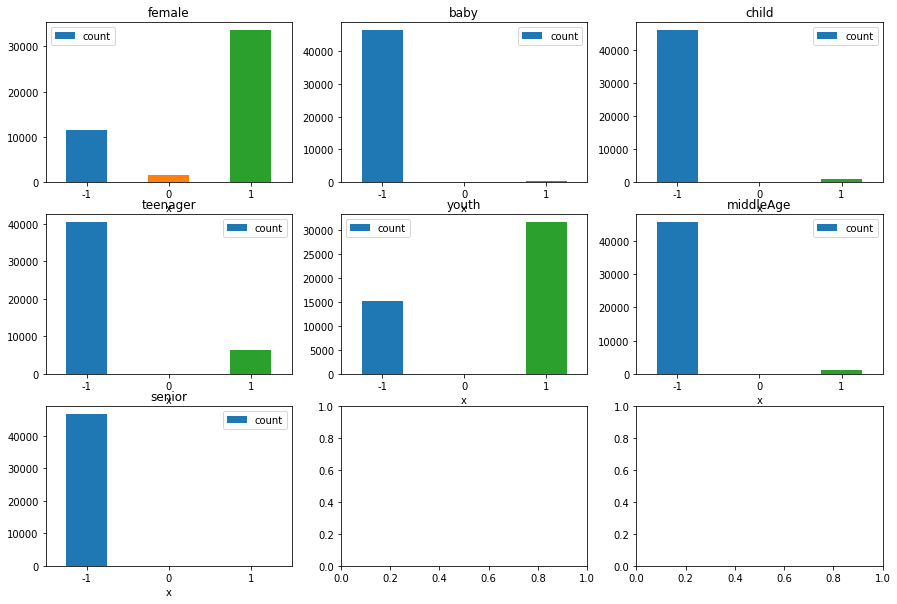

In [2]:
from checkpoint1 import analyze_dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ctr = 0
for df, col in analyze_dataset():
    ax = df.plot.bar(x="x", y="count", rot=0, title=col, ax=axes[ctr//3, ctr%3])
    ctr += 1
plt.show()

<h2>Checkpoint 2</h2>
<p>Now we created a new augmented dataset of 70000 samples by adding images to classes having fewer than 10000 images and removing images from classes having greater than 10000 images. Now we created a network using ResNet50 as the backbone. We removed the top layers and added 2 dense layers for classification of the input. The plots for training and validation loss are shown below. </p>
<table>
    <tr>
        <td><img src="images/dist_before.png"></img></td>
        <td><img src="images/dist_after.png"></img></td>
    </tr>
</table>


<h2>Checkpoint 3</h2>
<p>We tested the model using some selfies downloaded from google image search.</p>
<img src=""></img>

In [3]:
age_group = {0: 'baby', 1: 'child', 2: 'teenager', 3: 'youth', 4: 'middle-age', 5: 'senior'}
quality = {0: 'poor', 1: 'average', 2: 'great'}

def get_img(img_path):
    img = image.load_img(img_path, target_size=IMAGE_DIM)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x[0]

def decode_output(op, num_samples, io=1):
    if io == 1:
        print('\nModel1: Gender and age predictions\n')
        fig=plt.figure(figsize=(15, 10))
        columns, rows = 5, 2
        for i in range(num_samples):
            g, a = op[0][i][0], op[1][i]
            gender = 'female' if round(g) == 1 else 'male'
            age = age_group[np.argmax(a)]
            img = mpimg.imread('samples/image' + str(i + 1) + '.jpg')
            fig.add_subplot(rows, columns, i + 1)
            plt.title(gender + ' ' + age)
            plt.imshow(img)
        plt.show()
    elif io == 2:
        print('\nModel2: Other attribute predictions\n')
        op = [list(map(lambda y : int(round(y)), x)) for x in op]
        print(*op, sep='\n')
    elif io == 3:
        print('\nModel3: Popularity score and other attributes\n')
        op[0] = ['Popularity score: ' + str(x[0]) for x in op[0]]
        op[1] = [list(map(lambda y : int(round(y)), x)) for x in op[1]]
        op = list(zip(op[0], op[1]))
        print(*op, sep='\n')
    elif io == 4:
        op = [x[0] for x in op]
        print('Actual:', op)
    elif io == 5:
        print('\nModel5: Quality of image\n')
        op = [quality[np.argmax(x)] for x in op]
        print(op)
    elif io == 6:
        op = [quality[np.argmax(x)] for x in op]
        print('Actual:', op)
        
def try_model(model, num_samples, io=1):
    if io == 4:
        ip = next(img_loader(batch_size=num_samples, io=io))
        print('\nModel4: Popularity score from attributes\n')
        print('Expected:', ip[1])
        ip = ip[0]
    elif io == 6:
        ip = next(img_loader(batch_size=num_samples, io=io))
        print('\nModel6: Quality of selfie\n')
        print('Expected:', [quality[np.argmax(x)] for x in ip[1]])
        ip = ip[0]
    else:
        ip = []
        for i in range(num_samples):
            img_path = 'samples/image' + str(i + 1) + '.jpg'
            ip.append(get_img(img_path))
        ip = np.asarray(ip)
    op = model.predict(ip)
    decode_output(op, num_samples, io=io)


Model1: Gender and age predictions



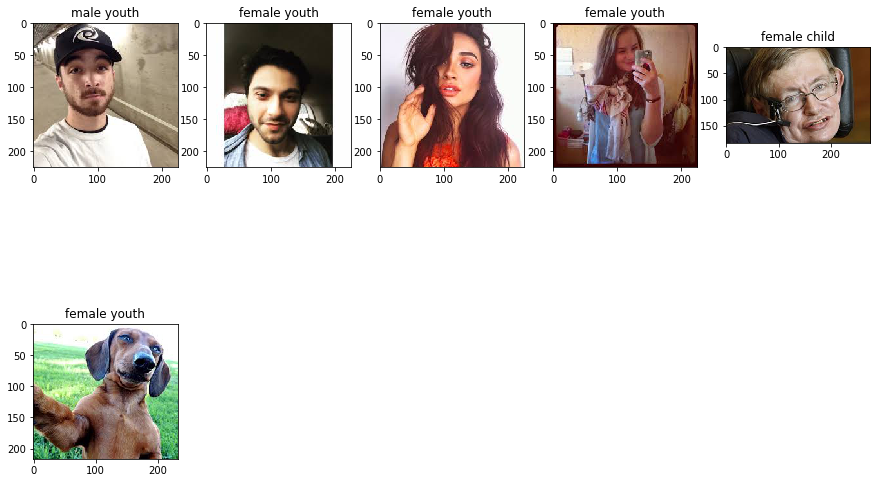


Model2: Other attribute predictions

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]

Model3: Popularity score and other attributes

('Popularity score: 0.0', [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])
('Popularity score: 0.0', [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1

C:\Users\Varun\Desktop\UntitledFolder\CVCR-Selfie\dataset_loader.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_list = train_df.as_matrix()



Model4: Popularity score from attributes

Expected: [4.085 5.047 4.282 4.346 3.676 5.003]
Actual: [4.36395, 4.1617975, 4.2278385, 4.0510597, 4.073814, 4.417243]

Model5: Quality of image

['average', 'average', 'average', 'average', 'average', 'great']

Model6: Quality of selfie

Expected: ['great', 'great', 'average', 'poor', 'average', 'average']
Actual: ['average', 'great', 'average', 'average', 'average', 'average']


In [4]:
NUM_SAMPLES = 6
    
for i in range(1, 7):
    model = load_model('weights/weights.' + str(i) + '.01.h5')
    try_model(model, NUM_SAMPLES, io=i)

<h2>Checkpoint 4</h2>
<p>Multiple classifiers and regressors are attached to the ResNet50 backbone. A binary classifier classifies whether the input image belongs to the female class or not. Another softmax classifier classifies the age group viz. baby, child, teenager, youth, middle_age, senior. And one classifier each are present for the other attributes present in the dataset. A regression head is attached to determine the popularity score of the given image along with the attributes. As part of checkpoint 6 we developed two more model on top of model3 and model4 to predict the quality of a selfie viz. poor, average, good.</p>
<table>
    <tr>
        <td><img src="images/model_image.1.png"></img><p>Fig1. The first model with image input and branched output of female and age</p></td>
        <td><img src="images/model_image.2.png"></img><p>Fig2. The second model with image input and branched output to female and all other attributes</p></td>
    </tr>
    <tr>
        <td><img src="images/model_image.3.png"></img><p>Fig3. Given the image, predict the popularity score along with all the attributes</p></td>
        <td><img src="images/model_image.4.png"></img><p>Fig4. Given the attributes predict the popularity score</p></td>
    </tr>
</table>

model 1


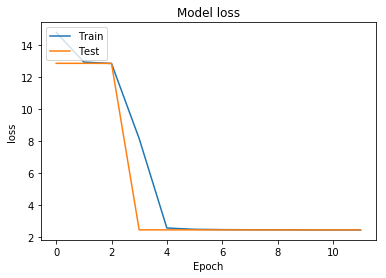

model 2


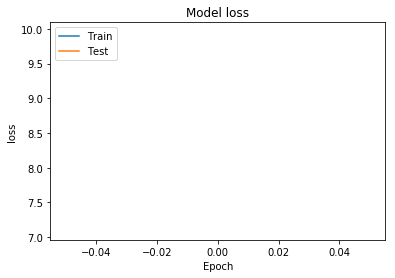

model 3


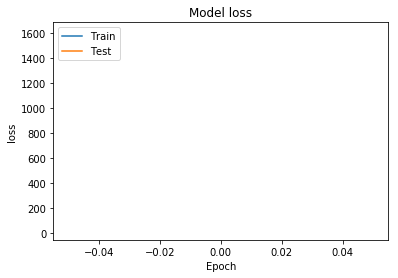

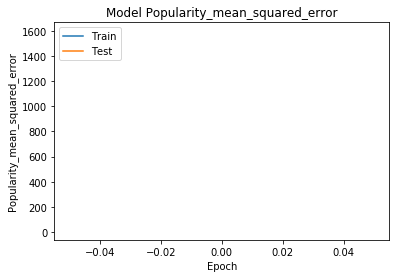

model 4


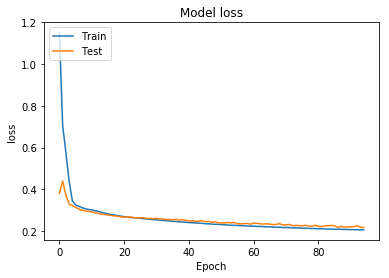

model 5


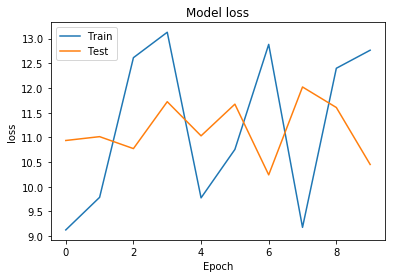

model 6


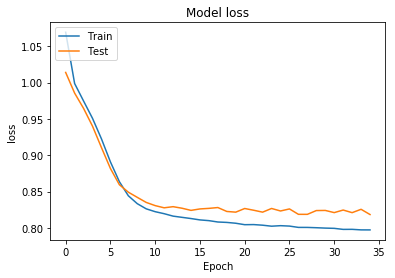

In [5]:
pop_mse = 'Popularity_mean_squared_error'

def plot_graph(history, met):
    plt.plot(history.history[met])
    plt.plot(history.history['val_' + met])
    plt.title('Model ' + met)
    plt.ylabel(met)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

for i in range(1, 7):
    with open('pickled_history.' + str(i) + '.pkl', 'rb') as fp:
        history = pickle.load(fp)
        print('model', i)
        plot_graph(history, 'loss')
        
        if pop_mse in history.history:
            plot_graph(history, pop_mse)

<h2>Checkpoint 6</h2>
<p>We removed the top most layer of model 4 and added a layer with 3 neurons one each for different qualities of selfies viz. poor, average and great. Below we compare the different attributes and their influence on the popularity score.<p>

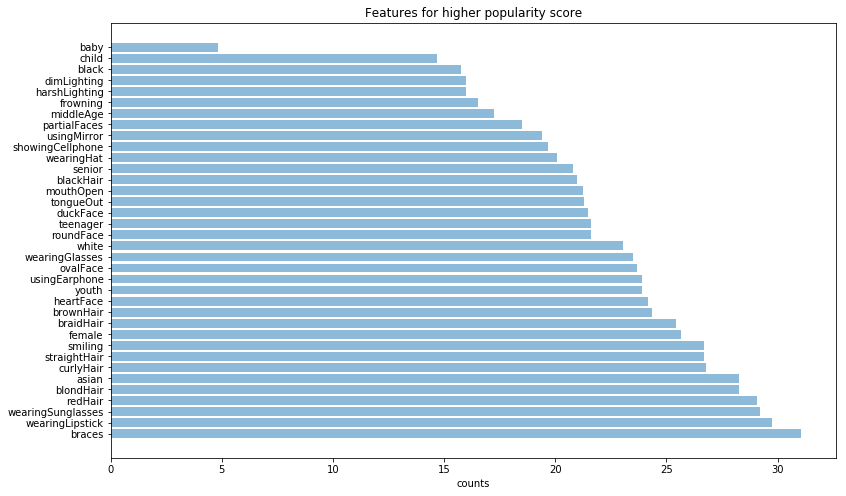

In [8]:
df = pd.read_csv('Selfie-dataset/selfie_dataset.txt', delim_whitespace=True, header=None)

sorted_x = []
for c in col.keys():
    if c == 'imageName' or c == 'popularityScore':
        continue
    sorted_x.append((c, (df.groupby(col[c])[col['popularityScore']].mean()[1] - 4) * 10 - 1))
sorted_x.sort(key=lambda x : x[1], reverse=True)

feat = [y[0] for y in sorted_x]
counts = [(y[1] + 0.05) * 8 for y in sorted_x]

y_pos = np.arange(len(feat))
plt.figure(figsize=(13, 8))
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, feat)
plt.xlabel('counts')
plt.title('Features for higher popularity score')
plt.show()

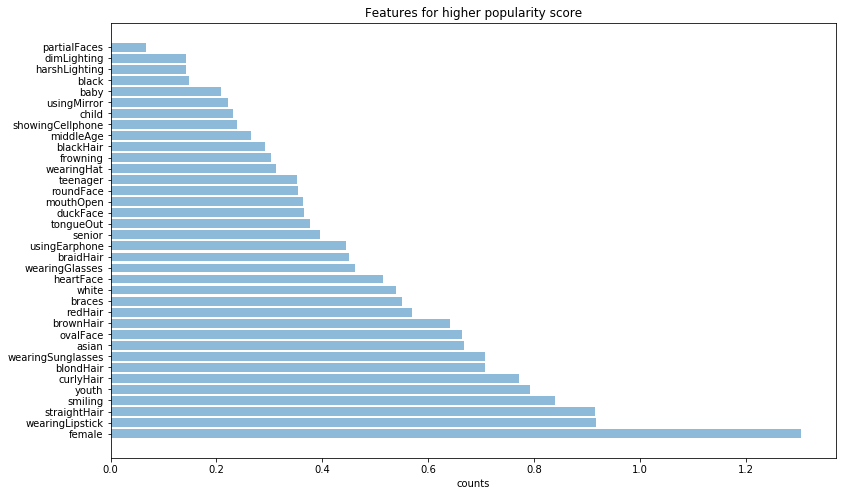

In [9]:
d = dict()
for i in df.columns.difference([col['popularityScore'], col['imageName']]):
    d[i] = df[col['popularityScore']].corr(df[i])
sorted_x = sorted(d.items(), key=lambda x : x[1], reverse=True)
reverse_dict = {col[x] : x for x in col}
sorted_x = [(reverse_dict[y[0]], y[1]) for y in sorted_x]

feat = [y[0] for y in sorted_x]
counts = [(y[1] + 0.05) * 8 for y in sorted_x]

y_pos = np.arange(len(feat))
plt.figure(figsize=(13, 8))
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, feat)
plt.xlabel('counts')
plt.title('Features for higher popularity score')
plt.show()